## K-means Clustering

Input:
- Training set, x(1),x(2),⋯,x(m)
- K number of clusters

Algorithm:  
- Initialize K cluster centroids at random locations i.e. choose k data points to be the initial centroids  

Then, repeat until convergence:  
for each point Xi:  
/// Assign each data point to the closest centroid
- find nearest centroid -> argmin Distance(Ci,Xi) where: c=centroid and x=each point
- assing the point X to cluster centroids

for each cluster centroids  
/// move centroid i.e. update centroids
- new centroid c = mean of all points X assigned to centroids in previous step

STOP when no one of the centroids change

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## Load and visualize the training set

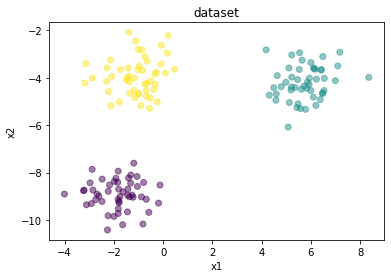

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.75, random_state=40)
plt.scatter(X[:,0], X[:,1],marker='o', c=y, alpha=0.5)
plt.title('dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## K - the number of cluster centroids

In [3]:
# Randomly initialize K cluster centroids
def picking_cluster_centroids(K, data):
    m = len(data)
    i = np.random.randint(1, m, K) # parameters (low, high, size)
    return data[i]*1.5

In [4]:
K = 5
mu = picking_cluster_centroids(K, X)
mu

array([[-1.02379857, -7.17105111],
       [-0.97506553, -4.95695287],
       [-1.53659527, -5.48667749],
       [ 7.78814157, -6.77741731],
       [ 6.46221873, -7.1006706 ]])

## Visualize the randomly initialize centroids

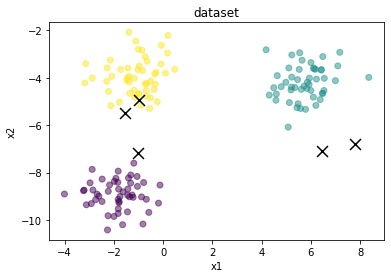

In [5]:
plt.scatter(X[:,0], X[:,1],marker='o', c=y, alpha=0.5)
plt.scatter(mu[:,0], mu[:,1], color='black', marker='x', s=120)
plt.title('dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## K-means

In [6]:
class Kmeans():
    def __init__(self, number_cluster_centroids, mu, max_iterations):
        self.K = number_cluster_centroids
        self.centroids = mu
        self.iterations = max_iterations
        
    # Training K-means
    def fit(self, dataset):
        
        self.X = dataset
        self.cluster_centroids = np.zeros((self.K, 2))
        
        while self.iterations >= 0:
            self.iterations = self.iterations - 1
            
            # Cluster Assignment
            distance = pairwise_distances(X, self.centroids)
            assignments = np.argmin(distance, axis=1)
            
            # Move or update locations of centroids
            for idx in range(len(self.centroids)):
                data_point_index = np.where(np.array(assignments) == idx)
                point = X[data_point_index]
                self.cluster_centroids[idx] = np.mean(point, axis=0) 
                
  
        return self.cluster_centroids

    def visualize_centroids(self, X, mu):
        plt.scatter(X[:,0], X[:,1],marker='o', c=y, alpha=0.5)
        plt.scatter(mu[:,0], mu[:,1], color='black', marker='x', s=120)
        plt.title('dataset')
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()
        
    def visualize_3D(self, X, mu):
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(X[:,0], X[:,1],marker='o', c=y, alpha=0.2)
        ax.scatter(mu[:,0], mu[:,1], color='black', marker='x', s=120, alpha=0.9)
        

## Instantiating and training the model

In [7]:
kmeans = Kmeans(K, mu, 10)

new_centroids = kmeans.fit(X)

## Visualize the cluster centroids optimized

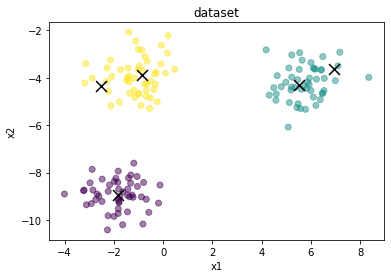

In [8]:
kmeans.visualize_centroids(X, new_centroids)

## Visualize in 3D

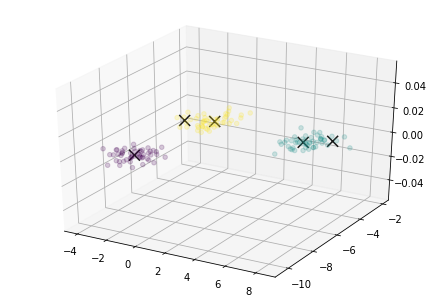

In [9]:
kmeans.visualize_3D(X, new_centroids)